In [9]:
import pygmt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import os
import cartopy.mpl.geoaxes
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

##### Load data

In [2]:
paleoseismicity = pd.read_excel('data_compilation.xlsx')


os.environ["CARTOPY_USER_BACKGROUNDS"] = "/home/alex/Maximum_Magnitude"



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

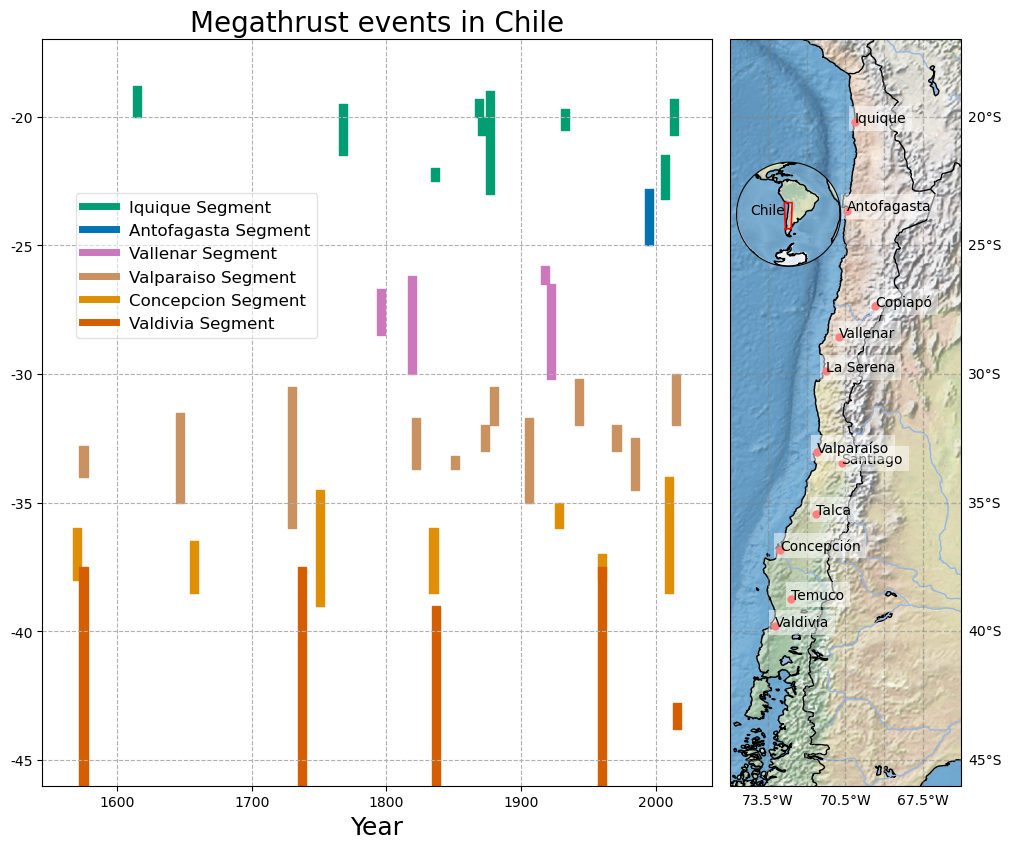

In [57]:
fig = plt.figure(figsize=(12, 8))

# Proyección Albers Equal-Area Conic centrada en Chile
cities = {
    'Santiago': (-70.6483, -33.4569),
    'Valparaíso': (-71.6127, -33.0464),
    'Concepción': (-73.0500, -36.8276),
    'La Serena': (-71.2518, -29.9027),
    'Temuco': (-72.6007, -38.7350),
    'Antofagasta': (-70.4482, -23.6503),
    'Iquique': (-70.1333, -20.2167),
    'Valdivia': (-73.2474, -39.8042),
    'Copiapó': (-69.3333, -27.3667),
    'Talca': (-71.6572, -35.4268),'Vallenar': (-70.7583, -28.5750)
}

ax = fig.add_subplot(122, projection=ccrs.PlateCarree())
ylim=[-46, -17]
ax.set_extent([-75, -66, -46, -17], crs=ccrs.PlateCarree())  # Extensión para Chile
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
axins = inset_axes(ax, width="45%", height="45%", loc="upper left", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.Orthographic(central_longitude=-70, central_latitude=-30)))
axins.add_feature(cartopy.feature.COASTLINE)
axins.stock_img()

# Dibujar un rectángulo alrededor de Chile en el inset usando plot
rect_lons = [-75, -66, -66, -75, -75]  # Longitudes para el rectángulo
rect_lats = [-46, -46, -17, -17, -46]  # Latitudes para el rectángulo
axins.plot(rect_lons, rect_lats, color='red', linestyle='-', linewidth=1.2,transform=ccrs.PlateCarree())
text='Chile'
axins.text(-75, -30, text, fontsize=10, ha='right', transform=ccrs.PlateCarree())


ax.background_img(name='NaturalEarthRelief', resolution='high')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.ylabels_left = False
gl.xlabels_top = False
ax.set_ylim(*ylim)
# Añadir las ciudades y sus nombres
for city, (lon, lat) in cities.items():
    ax.plot(lon, lat, 'ro', markersize=5, transform=ccrs.PlateCarree())  # Marca la ciudad
    t=ax.text(lon, lat, city, fontsize=10, ha='left', transform=ccrs.PlateCarree())  # Añade la etiqueta
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white',linewidth=0))

##
paleoseismicity = paleoseismicity[paleoseismicity['Subduction zone'] == 'South America']
filtered_paleoseismicity = paleoseismicity[paleoseismicity['Start'] <= -18.8]
color_palette = sns.color_palette("colorblind",10)
event_width_buffer = 3 # 3 years on either side of the event year for plotting rectangle
ax2 = fig.add_subplot(121)
legend_segments = {}
segment_colors = {}
for segment, segment_data in filtered_paleoseismicity.groupby('Segment'):
    # Extract info from dataframe for this subduction zone segment
    segment_colors[segment] = color_palette[len(segment_colors) % len(color_palette)]
    years = segment_data['Year']
    start = segment_data['Start']
    end = segment_data['End']
    type_lat_lon = segment_data['Type_lat_lon'].iloc[0]  # Assuming all values for this segment are the same
    color = segment_colors[segment]
    legend_segments[segment] = color

    for year, north_lat, south_lat in zip(years, start, end):
        ax2.fill_betweenx([south_lat, north_lat], year - event_width_buffer, year + event_width_buffer, label=segment, color=color)
legend_handles = [plt.Line2D([0], [0], linewidth = 5, color=color, label=segment) for segment, color in legend_segments.items()]
legend_handles2=[legend_handles[2],legend_handles[0],legend_handles[4],legend_handles[5],legend_handles[1],legend_handles[3]]

ax2.legend(handles=legend_handles2,loc=(0.05,0.6),framealpha=0.57,fontsize=12) # move legend outside of plot
ax2.set_ylim(ylim)
gl2 = ax2.grid(linestyle='--')
fig.tight_layout()
fig.subplots_adjust(wspace=-0.3)
ax2.set_xlabel('Year',fontsize=18)
plt.title('Megathrust events in Chile',fontsize=20)
fig.savefig('paleoseismicity.png',dpi=300)

In [55]:
paleoseismicity = paleoseismicity[paleoseismicity['Subduction zone'] == 'South America']
filtered_paleoseismicity = paleoseismicity[paleoseismicity['Start'] <= -18.8]
segment_min_start = filtered_paleoseismicity.groupby('Segment')['Start'].min()
segment_max_end = filtered_paleoseismicity.groupby('Segment')['End'].max()
segment_min_end = filtered_paleoseismicity.groupby('Segment')['End'].min()
segment_max_start = filtered_paleoseismicity.groupby('Segment')['Start'].max()
segment_data_dict = {
    segment: {
        'Start': segment_max_start[segment],
        'End': segment_min_end[segment]
    }
    for segment in filtered_paleoseismicity['Segment']
}
segment_data_dict

Line2D(Concepcion Segment)
